## Countries Clustering
### Submitted by : ANUSHKUMAR K

In [16]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [17]:
## Data Understanding

initial_data = pd.read_csv('C:/Users/Anush/Documents/Python/Upgrad_Notes/Upgrad_Notes/Course2-ML/HELP_Assignment/Country-data.csv')
initial_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [18]:
## Conveting the data from percentage to actual values
initial_data['imports']=initial_data['imports']*initial_data['gdpp']/100
initial_data['exports']=initial_data['exports']*initial_data['gdpp']/100
initial_data['health']=initial_data['health']*initial_data['gdpp']/100
initial_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [19]:
initial_data.shape
initial_data.info()
initial_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

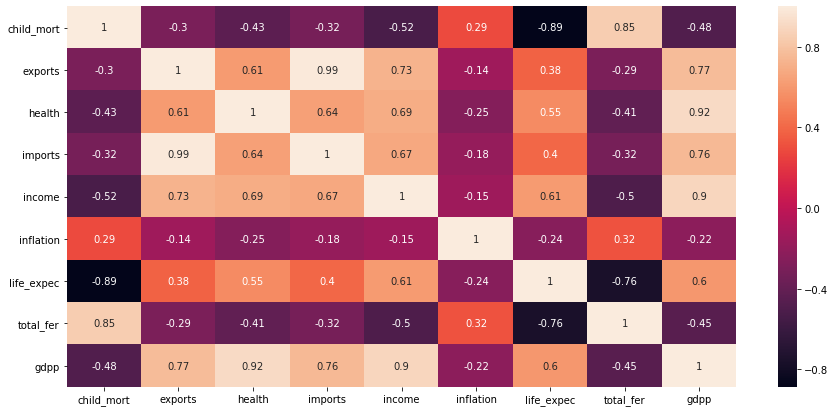

In [20]:
## Correleation Heatmap of the current columns
plt.figure(figsize=(15,7))
sns.heatmap(initial_data.corr(),annot=True)

We have multiple highly correlated variables from the heat map. Hence we need to use the PCA algorithm.

In [21]:
## Dropping country column to align with the final matrix

data_drop_country=initial_data.drop(['country'],axis=1)
data_drop_country.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [22]:
## Rescaling because PCA has to be applied

from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()
revised_data1 = standard_scaler.fit_transform(data_drop_country)
revised_data1

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [25]:
## Importing the PCA Module

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(revised_data1)
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [26]:
## Variance ratio

pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

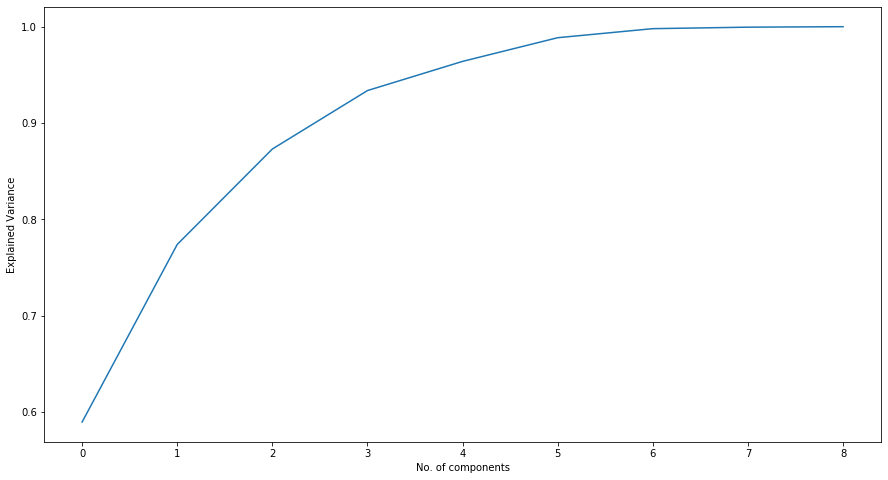

In [29]:
## Screeplot - plotting cumulative variance against number of components
%matplotlib inline
fig=plt.figure(figsize=(15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of components')
plt.ylabel('Explained Variance')
plt.show()

From the plot above, we can see that almost 90% datais explained clearly by the first 3 PCA components. We can use them for clustering of data

In [32]:
cols_after_drop=list(initial_data.drop('country',axis=1).columns)
cluster_df1 = pd.DataFrame({'Feature':cols_after_drop,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
cluster_df1

,Feature,PC1,PC2,PC3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


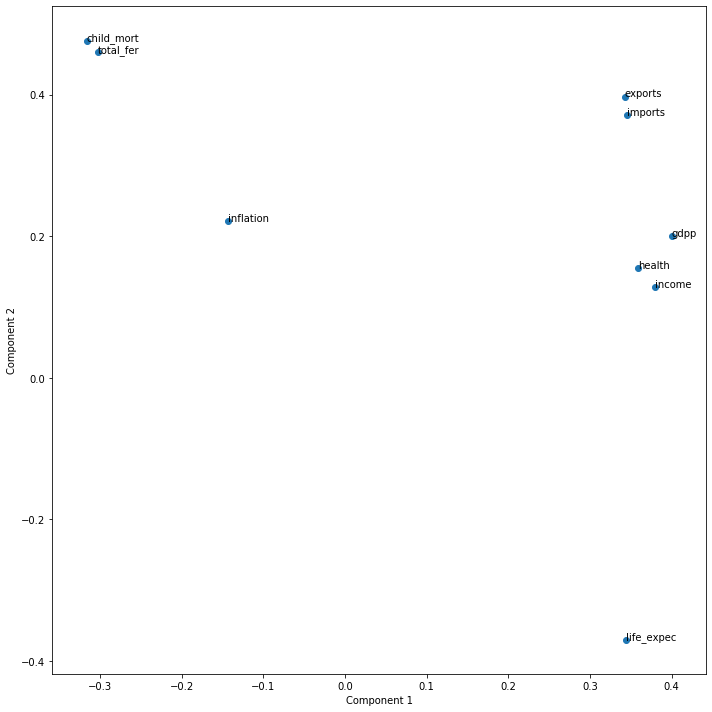

In [33]:
## Plotting 2 components

%matplotlib inline
fig = plt.figure(figsize=(10,10))
plt.scatter(cluster_df1.PC1,cluster_df1.PC2)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
for i ,y in enumerate(cluster_df1.Feature):
    plt.annotate(y,(cluster_df1.PC1[i],cluster_df1.PC2[i]))
plt.tight_layout()
plt.show()

Child mortality and total fertility is well explained by the 2nd component. Others are well explained by the first component.

In [34]:
## Incremental PCA
from sklearn.decomposition import IncrementalPCA
final_pca=IncrementalPCA(n_components=3)

In [36]:
## Our data with principal components

df_train=final_pca.fit_transform(revised_data1)
df_train.shape

(167, 3)

In [37]:
## Transpose of the matrix to create the new matrix

transpose_df=np.transpose(df_train)
transpose_df

array([[-2.63744157e+00, -2.22769569e-02, -4.57626261e-01,
        -2.72452030e+00,  6.49848516e-01,  3.71968554e-02,
        -3.32691520e-01,  3.18036154e+00,  3.81568156e+00,
        -4.67515152e-01,  1.49875246e+00,  1.47097104e+00,
        -1.01419903e+00,  8.45238116e-01, -1.34473920e-02,
         3.96087770e+00, -4.02707071e-01, -2.36598657e+00,
        -7.14998191e-01, -1.01778054e+00,  2.52812687e-01,
        -1.13095912e+00,  1.66280202e-01,  2.69525065e+00,
         2.80569006e-01, -2.75387449e+00, -2.76406823e+00,
        -1.17929406e+00, -2.44142939e+00,  3.39411994e+00,
        -5.23229456e-01, -3.24153046e+00, -3.18889212e+00,
         6.92394286e-01, -1.28851026e-01, -1.38822916e-02,
        -1.94991207e+00, -3.11679859e+00, -2.04776384e+00,
         4.31523541e-01, -2.57476033e+00,  8.46278142e-01,
         2.31379384e+00,  1.67463303e+00,  4.37600084e+00,
        -3.67788028e-01, -3.02658561e-01, -8.36646810e-01,
        -3.36572123e-01, -1.05577406e+00, -1.94848965e+0

In [39]:
## New Matrix

rownames = list(initial_data['country'])
df2_pca = pd.DataFrame({'country':rownames,'PC1':transpose_df[0],'PC2':transpose_df[1],'PC3':transpose_df[2]})
df2_pca.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


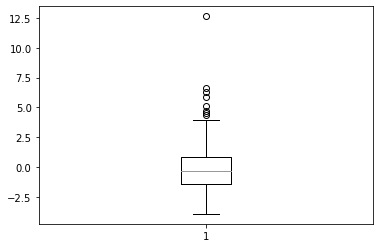

In [40]:
## Identifying the outliers

plt.boxplot(df2_pca.PC1)
Q1 = df2_pca.PC1.quantile(0.05)
Q3 = df2_pca.PC1.quantile(0.95)
IQR=Q3-Q1
df2_pca = df2_pca[(df2_pca.PC1>=Q1) & (df2_pca.PC1<=Q3)]

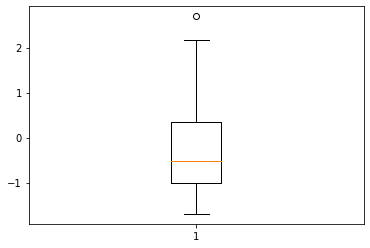

In [42]:
plt.boxplot(df2_pca.PC2)
Q1 = df2_pca.PC2.quantile(0.05)
Q3 = df2_pca.PC2.quantile(0.95)
IQR=Q3-Q1
df2_pca = df2_pca[(df2_pca.PC2>=Q1) & (df2_pca.PC2<=Q3)]

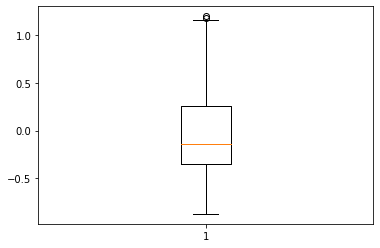

In [75]:
plt.boxplot(df2_pca.PC3)
Q1 = df2_pca.PC3.quantile(0.05)
Q3 = df2_pca.PC3.quantile(0.95)
IQR=Q3-Q1
data_df3 = df2_pca[(df2_pca.PC3>=Q1) & (df2_pca.PC3<=Q3)]

In [77]:
df2_pca.shape

(119, 4)

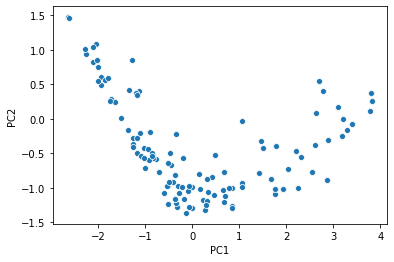

In [78]:
## Scatterplot to see the spread of the dataset

sns.scatterplot(x='PC1',y='PC2',data=df2_pca)

## Clustering

In [79]:
## calculate the hopkins statistic if the data is suitable for clustering

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    a = X.shape[1]
    b=len(X)
    c=int(0.1*b)
    nbrs=NearestNeighbors(n_neighbors=1).fit(X.values)
    random_X=sample(range(0,b,1),c)
    
    d1=[]
    d2=[]
    for j in range(0,c):
        dist1,_=nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),a).reshape(1,-1),2,return_distance=True)
        d1.append(dist1[0][1])
        dist2,_=nbrs.kneighbors(X.iloc[random_X[j]].values.reshape(1,-1),2,return_distance=True)
        d2.append(dist2[0][1])
        
    hopkinsstat = sum(d1)/(sum(d1)+sum(d2))
    if isnan(hopkinsstat):
        print(d1,d2)
        hopkinsstat=0
        
    return hopkinsstat

In [80]:
#Hopkins statistic measure
hopkins(df2_pca.drop(['country'],axis=1))

0.8431916884948214

## Heirarchical Clustering

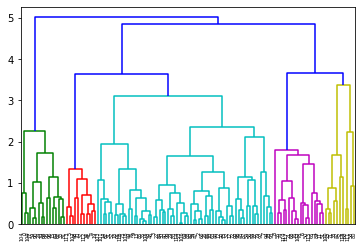

In [81]:
## Heirarchical clustering using single linkage procedure
data_df3 = df2_pca
data_df3_df1=standard_scaler.fit_transform(data_df3.drop(['country'],axis=1))
mergings = linkage(data_df3_df1,method="complete",metric='euclidean')
dendrogram(mergings)
plt.show()

In [83]:
## Cluster cutting for better shapes

Clustercut = pd.Series(cut_tree(mergings,n_clusters=5).reshape(-1,))
data_df3_hc=pd.concat([data_df3,Clustercut],axis=1)
data_df3_hc.columns=['country','PC1','PC2','PC3','ClusterID']
data_df3_hc.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,0.0
1,NaN,NaN,NaN,NaN,1.0
2,Algeria,-0.457626,-0.673301,0.961867,2.0
3,NaN,NaN,NaN,NaN,2.0
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103,3.0


In [84]:
dat4=pd.merge(initial_data,data_df3_hc,on='country')
dat5=dat4[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
dat5.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,0.0
1,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,2.0
2,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,3.0
3,Armenia,18.1,669.76,1458.660,141.6800,6700,7.77,73.3,1.69,3220,1.0
4,Australia,4.8,10276.20,10847.100,4530.8700,41400,1.16,82.0,1.93,51900,2.0


In [85]:
dat5['ClusterID'].value_counts()

2.0    40
1.0    16
0.0    11
4.0    10
3.0     7
Name: ClusterID, dtype: int64

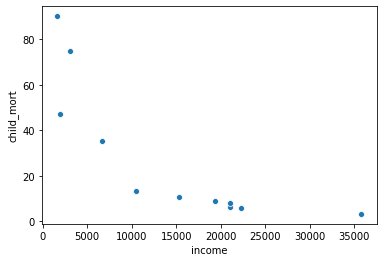

In [86]:
## Visualizing the clusters
datfinal=dat5[dat5['ClusterID']==0]
sns.scatterplot(x='income',y='child_mort',data=datfinal)

We are not getting proper clusters in the heirarchical clustering. So we will see if clusters are formed properly in k-means clustering

## K-Means Clustering

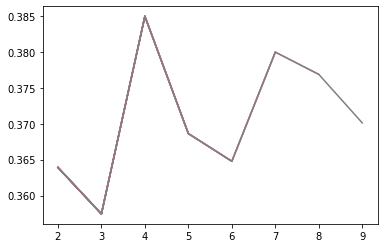

In [89]:
from sklearn.metrics import silhouette_score
sse_=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k).fit(data_df3_df1)
    sse_.append([k,silhouette_score(data_df3_df1,kmeans.labels_)])
    plt.plot(pd.DataFrame(sse_)[0],pd.DataFrame(sse_)[1])

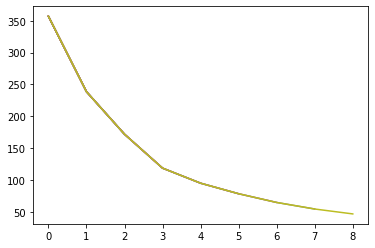

In [92]:
ssd=[]
for num_clusters in list(range(1,10)):
    model_cluster=KMeans(n_clusters=num_clusters,max_iter=50)
    model_cluster.fit(data_df3_df1)
    ssd.append(model_cluster.inertia_)
    plt.plot(ssd)

In [94]:
## check with k value as 5

model_cluster5=KMeans(n_clusters=5,max_iter=50)
model_cluster5.fit(data_df3_df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [95]:
df4=data_df3
df4.index=pd.RangeIndex(len(df4.index))
data_km=pd.concat([df4,pd.Series(model_cluster5.labels_)],axis=1)
data_km.columns=['country','PC1','PC2','PC3','ClusterID']
data_km.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,3
1,Algeria,-0.457626,-0.673301,0.961867,4
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,0
3,Armenia,-0.332692,-1.274517,0.176636,0
4,Australia,3.180362,-0.250785,-0.116877,2


In [96]:
data_km['ClusterID'].value_counts()

0    54
2    21
3    19
4    17
1     8
Name: ClusterID, dtype: int64

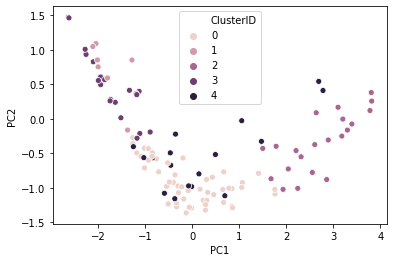

In [97]:
##Scatterplot to visualize the principal components

sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=data_km)

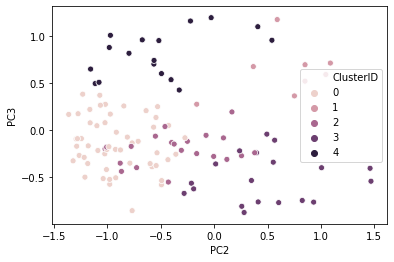

In [98]:
sns.scatterplot(x='PC2',y='PC3',hue='ClusterID',legend='full',data=data_km)

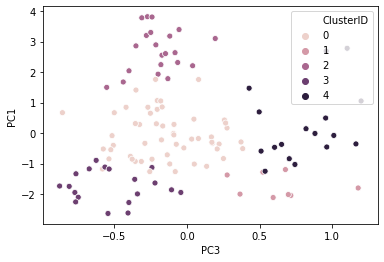

In [100]:
sns.scatterplot(x='PC3',y='PC1',hue='ClusterID',legend='full',data=data_km)

In [102]:
data5=pd.merge(initial_data,data_km,on='country')
data6=data5[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
cluster_chi=pd.DataFrame(data6.groupby(["ClusterID"]).child_mort.mean())
cluster_exp=pd.DataFrame(data6.groupby(["ClusterID"]).exports.mean())
cluster_imp=pd.DataFrame(data6.groupby(["ClusterID"]).imports.mean())
cluster_hea=pd.DataFrame(data6.groupby(["ClusterID"]).health.mean())
cluster_inc=pd.DataFrame(data6.groupby(["ClusterID"]).income.mean())
cluster_inf=pd.DataFrame(data6.groupby(["ClusterID"]).inflation.mean())
cluster_lif=pd.DataFrame(data6.groupby(["ClusterID"]).life_expec.mean())
cluster_tot=pd.DataFrame(data6.groupby(["ClusterID"]).total_fer.mean())
cluster_gdpp=pd.DataFrame(data6.groupby(["ClusterID"]).gdpp.mean())
df=pd.concat([pd.Series([0,1,2,3,4]),cluster_chi,cluster_exp,cluster_imp,cluster_hea,cluster_inc,cluster_inf,cluster_lif,cluster_tot,cluster_gdpp],axis=1)
df.columns=["ClusterID","Child_Mortality","Exports","Imports","Health","Income","Inflation","life_Expec","Total_fer","GDPP"]
df

,ClusterID,Child_Mortality,Exports,Imports,Health,Income,Inflation,life_Expec,Total_fer,GDPP
0,0,21.327778,3197.866906,3549.747687,476.537426,12019.629630,4.389981,73.307407,2.276296,6915.592593
1,1,65.250000,1367.857750,895.048500,134.866550,6203.750000,18.137500,65.537500,4.487500,2753.500000
2,2,4.795238,14001.761905,13929.619048,3758.980952,35566.666667,1.147381,80.376190,1.759048,37209.523810
3,3,65.084211,787.408095,969.381895,145.439137,3983.157895,6.446842,61.657895,4.266842,2025.947368
4,4,19.964706,6649.636094,4599.561059,472.387471,23580.588235,13.935294,72.976471,2.145882,11205.411765


We observe that Child mortality, Income, Inflation and GDP per capita are good predictors for the development of a country.

In [103]:
finallist=initial_data[initial_data['gdpp']<=1700]
finallist.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440,7.140,70.4,2.33,758
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231


In [104]:
finallist_countries=finallist[finallist['child_mort']>=76]
finaldf=finallist_countries[finallist_countries['income']<3200]
finaldf

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690,5.390,56.3,5.27,1220


## Final Remarks

Major focus for aid should be given to the above countries as described.